In [2]:
import pandas as pd

In [3]:
# Task 1: Import csv Data
data = pd.read_csv("temperatures.csv", usecols=["Zeitstempel", "Wert"], encoding="utf-8-sig")
data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"], format="%Y%m%d%H%M")
data.set_index("Zeitstempel", inplace=True)

In [4]:
# Task 2: Interpolate to 15 min intervals
upsampled = data.resample('15min').asfreq()
interpolated = upsampled.interpolate(method="linear", columns="Wert")
interpolated["Jahr"] = interpolated.index.year
interpolated["Monat"] = interpolated.index.month

In [5]:
# Task 3: Find minimum and maximum value for each year
max_werte = interpolated.loc[interpolated.groupby("Jahr")["Wert"].idxmax()]
min_werte = interpolated.loc[interpolated.groupby("Jahr")["Wert"].idxmin()]

In [10]:
# convert series to text
txt_max = max_werte.to_string(columns=["Wert"])
txt_min = min_werte.to_string(columns=["Wert"])

In [11]:
# output to txt file
with open("output.txt", "w", encoding="utf8") as output:
    output.write("Höchsttemperatur pro Jahr:" + "\n")
    output.write(txt_max + "\n\n")
    output.write("Tiefsttemperatur pro Jahr:" + "\n")
    output.write(txt_min)

<AxesSubplot:title={'center':'Tiefsttemperatuen'}, xlabel='Uhrzeit'>

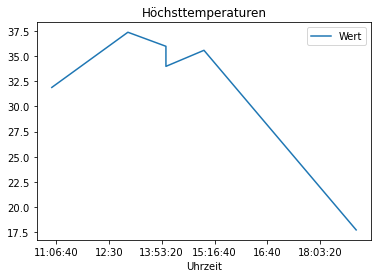

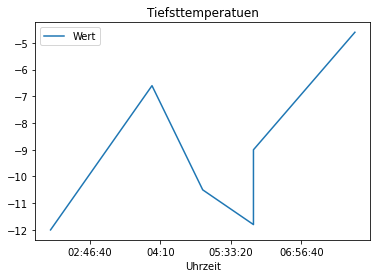

In [8]:
# Task 4: Plot the temperatures for the hottest and coldest days of each year
# provided into the same axis, over time of day
max_werte["Uhrzeit"] = max_werte.index.time
min_werte["Uhrzeit"] = min_werte.index.time
max_werte.plot(x="Uhrzeit", y="Wert", title="Höchsttemperaturen")
min_werte.plot(x="Uhrzeit", y="Wert", title="Tiefsttemperatuen")

<AxesSubplot:title={'center':'Durchschnittstemperatur pro Monat'}, xlabel='Monat'>

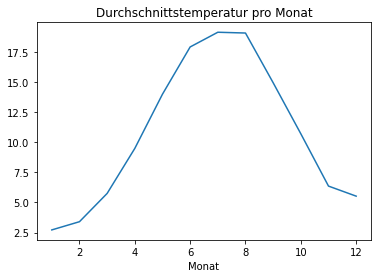

In [9]:
# Task 5: one extra analysis of the dataset
mean = interpolated.groupby("Monat")["Wert"].mean()
mean.plot(title="Durchschnittstemperatur pro Monat")